In [2]:
# %%
from ast import GtE
from cmath import nan
from contextlib import nullcontext
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import scipy
from plotly.subplots import make_subplots
import math
import os

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# SVM 
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

from betacal import BetaCalibration


from sklearn.datasets import load_digits
from sklearn.manifold import Isomap, TSNE, LocallyLinearEmbedding, SpectralEmbedding


from sklearn.svm import SVC

import random

import datetime
from datetime import timedelta

In [3]:
# census block to county name
censusblock_county_df = pd.read_csv("/Users/Iris/CitadelWomenDatathon/census_code_mappers/us_blocks.csv")

In [4]:
# by census block
urban_tree_canopy_df = pd.read_csv("/Users/Iris/CitadelWomenDatathon/greenspace_data/urban_tree_canopy.csv")

In [5]:
urban_tree_canopy_df.head()

,city_name,census_block,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group
0,"Memphis, TN--MS--AR",4.715701e+14,0.170732,0.276204,29.350,9249,1,4
1,"Memphis, TN--MS--AR",4.715701e+14,0.000000,0.276204,30.350,9249,1,4
2,"Memphis, TN--MS--AR",4.715701e+14,0.050112,0.276204,32.834,12071,1,4
3,"Memphis, TN--MS--AR",4.715701e+14,0.265038,0.276204,31.000,7721,1,4
4,"Memphis, TN--MS--AR",4.715701e+14,0.045038,0.276204,31.450,7721,1,4


In [6]:
len(urban_tree_canopy_df['census_block'].unique())

1938356

In [7]:
nyc_df = urban_tree_canopy_df.loc[urban_tree_canopy_df['city_name'] == 'New York--Newark, NY--NJ--CT']

In [8]:
(nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 1]['census_block']).unique

<bound method Series.unique of 1230124    3.608501e+14
1230125    3.401301e+14
1230126    3.401300e+14
1230127    3.401300e+14
1230128    3.604712e+14
               ...     
1378538    3.610320e+14
1378539    3.610320e+14
1378540    3.610320e+14
1378541    3.610320e+14
1378542    3.610320e+14
Name: census_block, Length: 56056, dtype: float64>

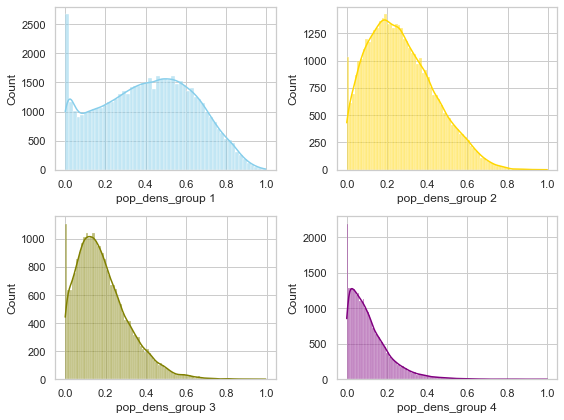

In [9]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (8,6))
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 1], x="mean_percent_tree_cover", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_xlabel('pop_dens_group 1')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 2], x="mean_percent_tree_cover", kde=True, color="gold", ax=axs[0, 1])
axs[0, 1].set_xlabel('pop_dens_group 2')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 3], x="mean_percent_tree_cover", kde=True, color="olive", ax=axs[1, 0])
axs[1, 0].set_xlabel('pop_dens_group 3')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['pop_dens_group'] == 4], x="mean_percent_tree_cover", kde=True, color="purple", ax=axs[1, 1])
axs[1, 1].set_xlabel('pop_dens_group 4')
fig.tight_layout()

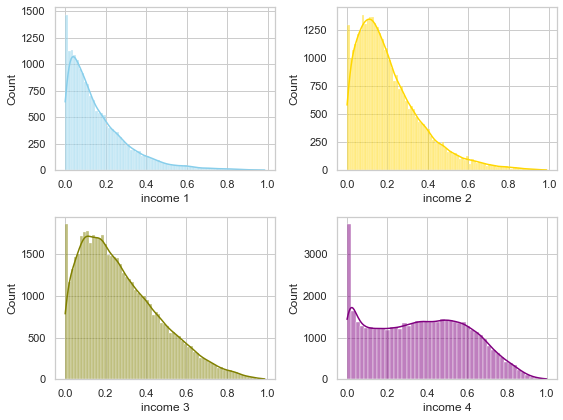

In [10]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (8,6))
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 1], x="mean_percent_tree_cover", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_xlabel('income 1')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 2], x="mean_percent_tree_cover", kde=True, color="gold", ax=axs[0, 1])
axs[0, 1].set_xlabel('income 2')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 3], x="mean_percent_tree_cover", kde=True, color="olive", ax=axs[1, 0])
axs[1, 0].set_xlabel('income 3')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 4], x="mean_percent_tree_cover", kde=True, color="purple", ax=axs[1, 1])
axs[1, 1].set_xlabel('income 4')
fig.tight_layout()

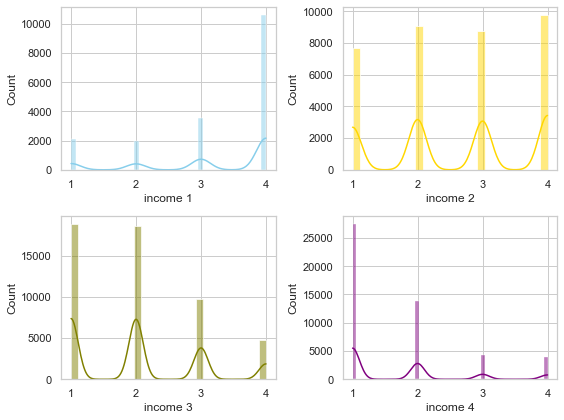

In [11]:
import seaborn as sns
sns.set(style="whitegrid")  
fig,axs = plt.subplots(2,2, figsize = (8,6))
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 1], x="pop_dens_group", kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_xlabel('income 1')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 2], x="pop_dens_group", kde=True, color="gold", ax=axs[0, 1])
axs[0, 1].set_xlabel('income 2')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 3], x="pop_dens_group", kde=True, color="olive", ax=axs[1, 0])
axs[1, 0].set_xlabel('income 3')
sns.histplot(data=nyc_df.loc[urban_tree_canopy_df['income_group'] == 4], x="pop_dens_group", kde=True, color="purple", ax=axs[1, 1])
axs[1, 1].set_xlabel('income 4')
fig.tight_layout()

In [12]:
censusblock_county_df

,state_fip,county_fip,county_name,tract_fip,block,tract_geoid,block_geoid
0,4,1,Apache County,942600,1000,4001942600,40019426001000
1,4,1,Apache County,942600,1001,4001942600,40019426001001
2,4,1,Apache County,942600,1002,4001942600,40019426001002
3,4,1,Apache County,942600,1003,4001942600,40019426001003
4,4,1,Apache County,942600,1004,4001942600,40019426001004
...,...,...,...,...,...,...,...
11158380,41,71,Yamhill County,31000,2138,41071031000,410710310002138
11158381,41,71,Yamhill County,31000,2139,41071031000,410710310002139
11158382,41,71,Yamhill County,31000,2140,41071031000,410710310002140
11158383,41,71,Yamhill County,31000,2141,41071031000,410710310002141
